In [1]:
# loading the IMDB dataset

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
import numpy as np


def vectorize_sequences(sequences, demension=10000):
    results = np.zeros((len(sequences), demension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
# vectorize labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

modeld = models.Sequential()
modeld.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
modeld.add(layers.Dropout(0.5))
modeld.add(layers.Dense(4, activation='relu'))
modeld.add(layers.Dropout(0.5))
modeld.add(layers.Dense(1, activation='sigmoid'))

2022-07-21 12:52:48.318207: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-21 12:52:48.320654: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')
modeld.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
historyd = modeld.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5103 - accuracy: 0.7792 - val_loss: 0.3789 - val_accuracy: 0.8690
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2963 - accuracy: 0.9029 - val_loss: 0.3184 - val_accuracy: 0.8765
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2121 - accuracy: 0.9321 - val_loss: 0.2837 - val_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1684 - accuracy: 0.9466 - val_loss: 0.3192 - val_accuracy: 0.8730
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1400 - accuracy: 0.9541 - val_loss: 0.3001 - val_accuracy: 0.8809
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1123 - accuracy: 0.9667 - val_loss: 0.3120 - val_accuracy: 0.8783
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0927 - accuracy: 0.9737 - val_loss: 0.3245 - val_accuracy: 0.8789
Epoch 8/20
30

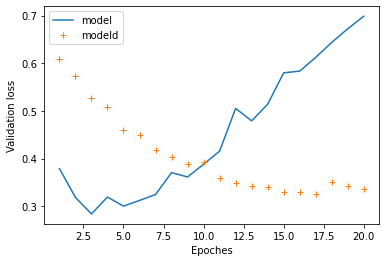

In [8]:
import matplotlib.pyplot as plt


val_loss_values = history.history['val_loss']
epoches = range(1, len(val_loss_values) + 1)
plt.plot(epoches, val_loss_values, '-', label='model')

val_loss_values = historyd.history['val_loss']
epoches = range(1, len(val_loss_values) + 1)
plt.plot(epoches, val_loss_values, '+', label='modeld')

plt.xlabel('Epoches')
plt.ylabel('Validation loss')
plt.legend()
plt.show()